This notebook contains design, implementation and comparision of different clustering models applied to Rivers dataset.

In [3]:
import numpy as np
import pandas as pd
import random
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette=sns.color_palette("hls", 3),font_scale=0.75)

#Load data
rivers = pd.read_csv('rivers.csv', encoding="utf_8")

#Drop Id and Name columns
river_names = rivers["River"]
rivers.drop(rivers.columns[[0,1]], axis=1, inplace=True)

#Filling NaNs
rivers["AverageRiverSlope"].fillna(0, inplace=True)
rivers["Ml"].fillna(rivers["Ml"].mean(), inplace=True)
rivers['RiverNetworkDensity'] = rivers['RiverNetworkDensity'].apply(lambda x: round(random.uniform(0.25, 1.01), 2) if pd.isnull(x) else x)
rivers["Waterlogged"] = rivers["Waterlogged"] = [str(round(random.uniform(0.1, 0.9), 1)) if x=='<1' else str(random.randint(1,4)) if x=='<5' else x for x in rivers["Waterlogged"]]
rivers["Ozernost'"] = [np.NaN if (x=='<1') else x for x in rivers["Ozernost'"]]
rivers["Ozernost'"] = [round(random.uniform(0.1, 0.9), 1) if pd.isnull(x) else x for x in rivers["Ozernost'"]]
for col in  rivers.columns[4:6]:
    rivers[col] = pd.to_numeric(rivers[col], errors='coerce')
    
rivers.drop(rivers.columns[[3,7]], axis=1, inplace=True)

#Pair plots for all features     
#sns.pairplot(rivers, size=2.5);

Checking correlation

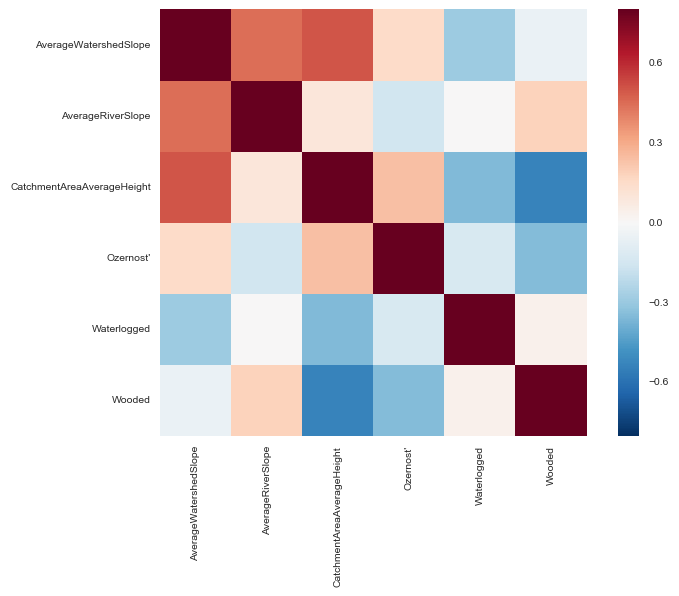

In [4]:
corrmat = rivers.corr()
sns.heatmap(corrmat, vmax=.8, square=True)

In [5]:
from sklearn import preprocessing
col_names = rivers.columns
x = rivers.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
rivers = pd.DataFrame(x_scaled, columns=col_names)

Now make some magic

In [6]:
from sklearn.cluster import KMeans
kmeans02 = KMeans(n_clusters=2, random_state=0).fit(rivers)
kmeans03 = KMeans(n_clusters=3, random_state=0).fit(rivers)

Now show pair plots with separation by 2 and 3 clusters

In [7]:
#rivers["Type02"] = kmeans02.labels_
#rivers["Type03"] = kmeans03.labels_

#sns.pairplot(rivers, hue="Type02", size=2.5);
#sns.pairplot(rivers, hue="Type03", size=2.5);

res02 = kmeans02.transform(rivers)
res03 = kmeans03.transform(rivers)

Plots of found clusters

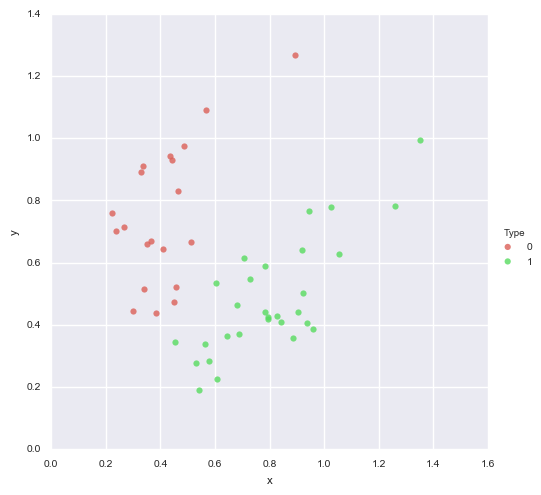

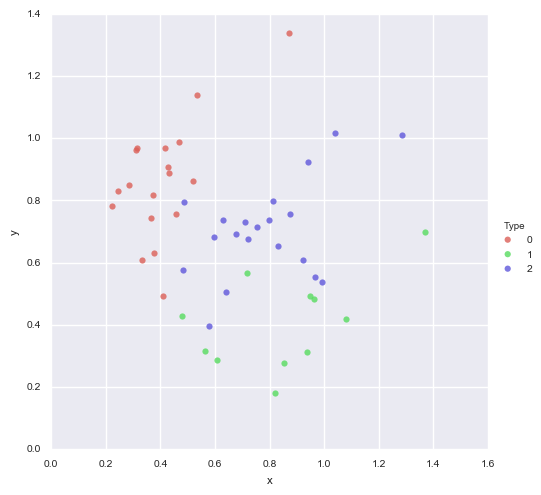

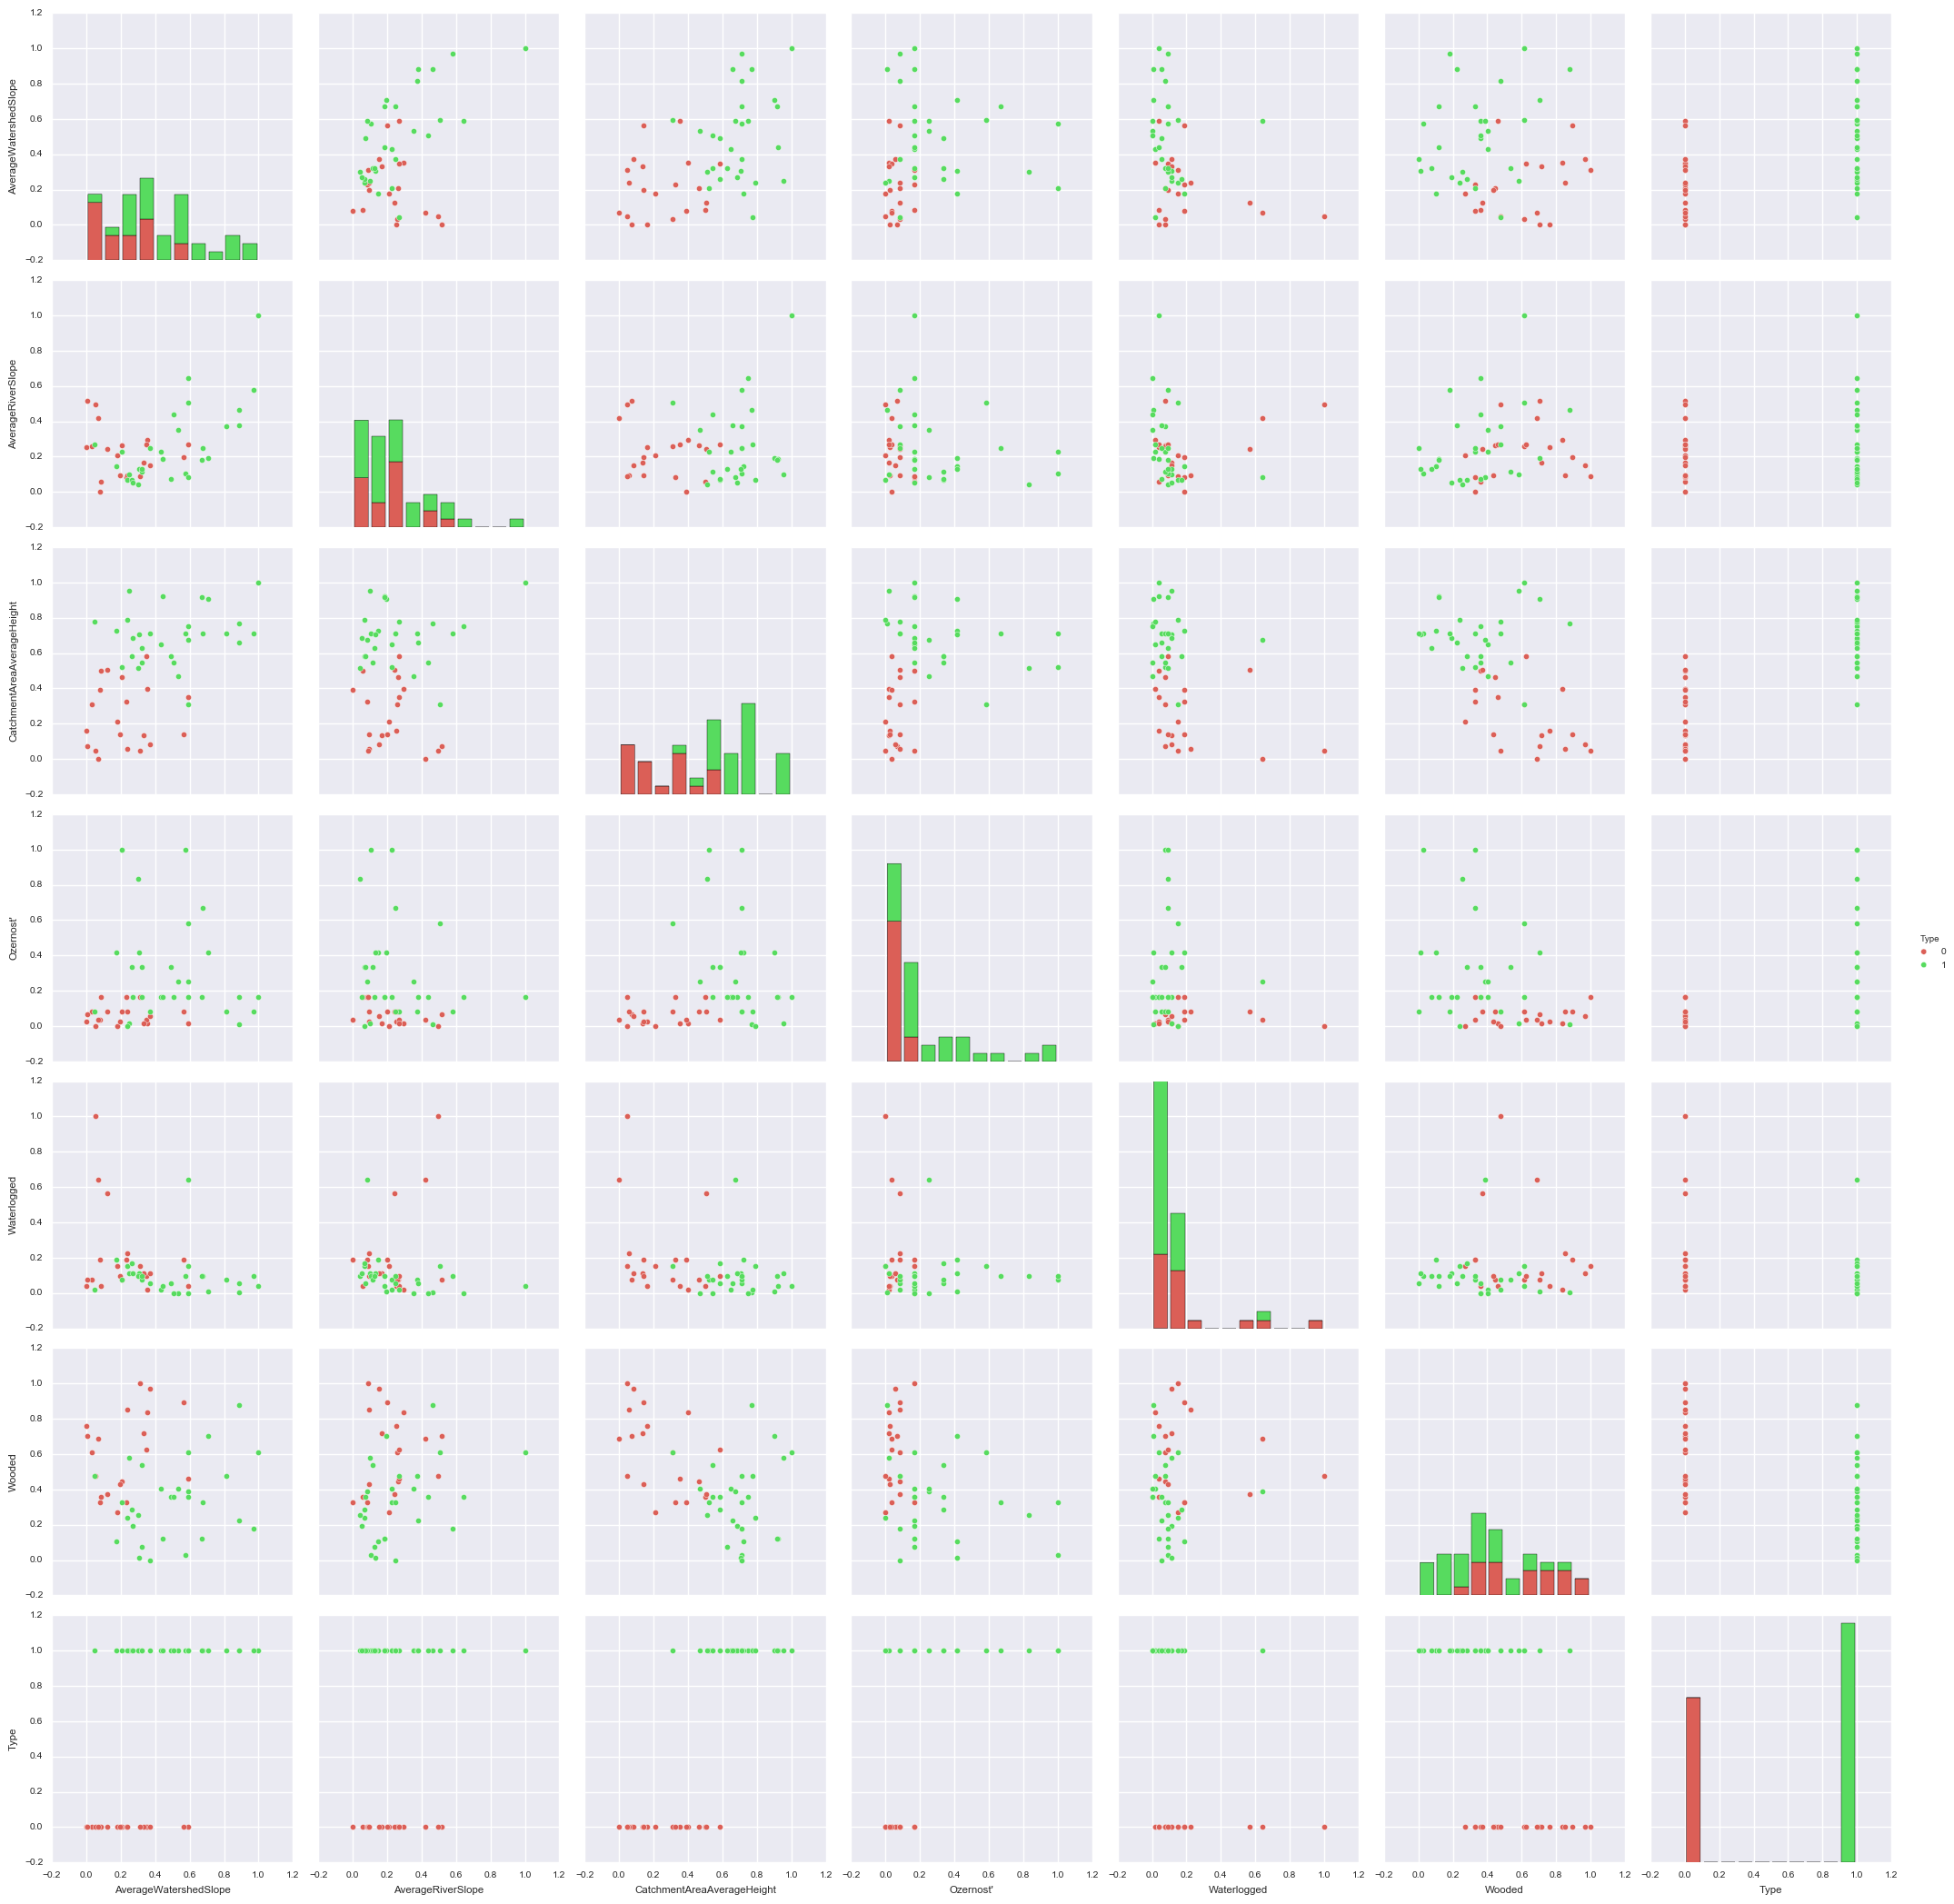

In [8]:
proj1 = pd.DataFrame({
                    "Name": river_names,
                    "x": res02[:,0],
                    "y": res02[:,1],
                    "Type": kmeans02.labels_
                    })

proj2 = pd.DataFrame({
                    "Name": river_names,
                    "x": res03[:,0],
                    "y": res03[:,1],
                    "Type": kmeans03.labels_
                    })

sns.lmplot('x', 'y', data=proj1, hue='Type', fit_reg=False)
sns.lmplot('x', 'y', data=proj2, hue='Type', fit_reg=False)

rivers_labeled = rivers
rivers_labeled["Type"] = kmeans02.labels_

sns.pairplot(rivers_labeled, hue="Type", size=3);

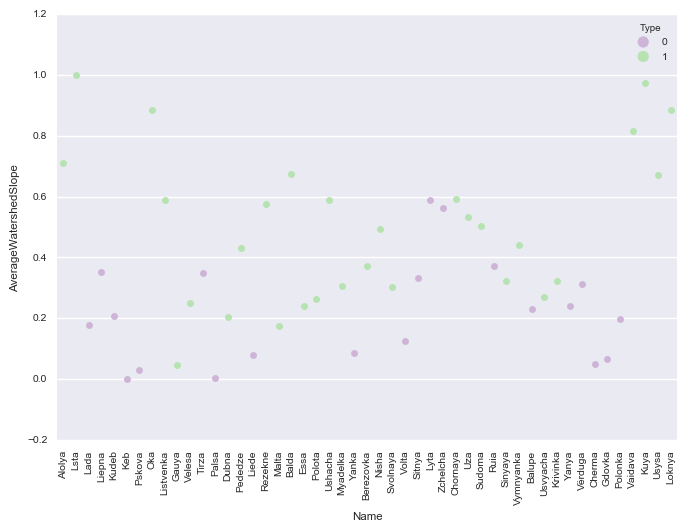

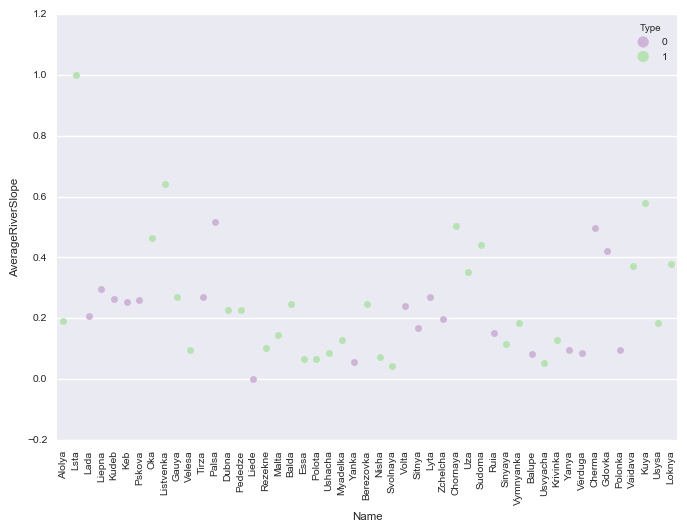

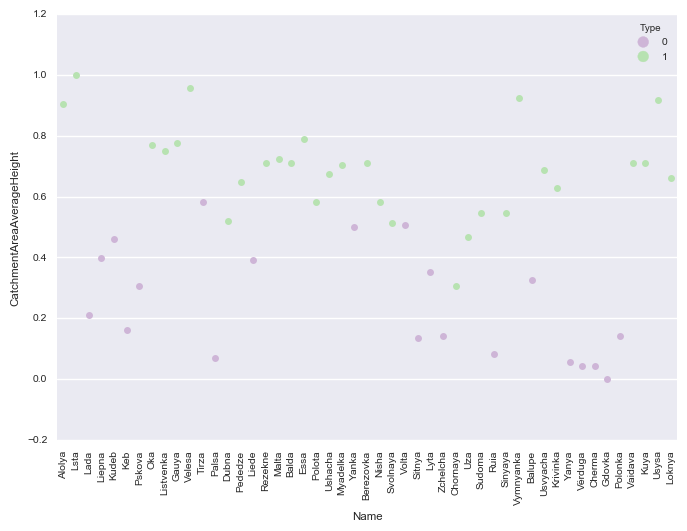

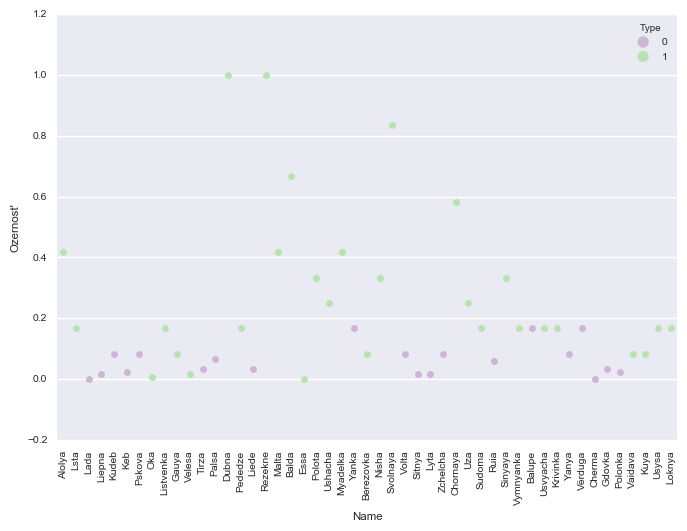

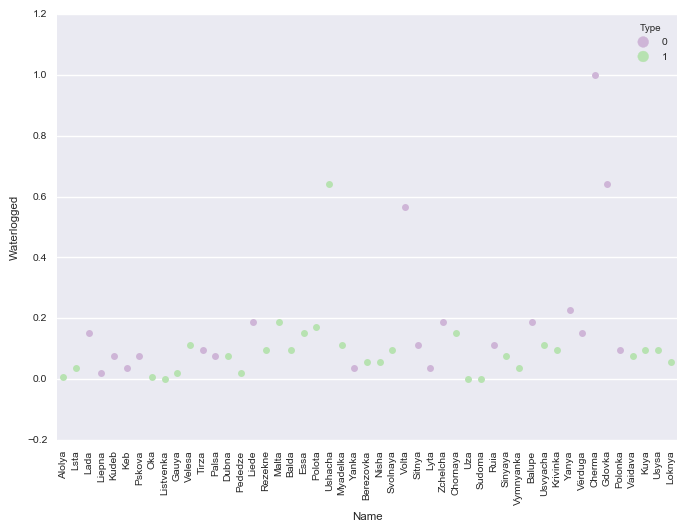

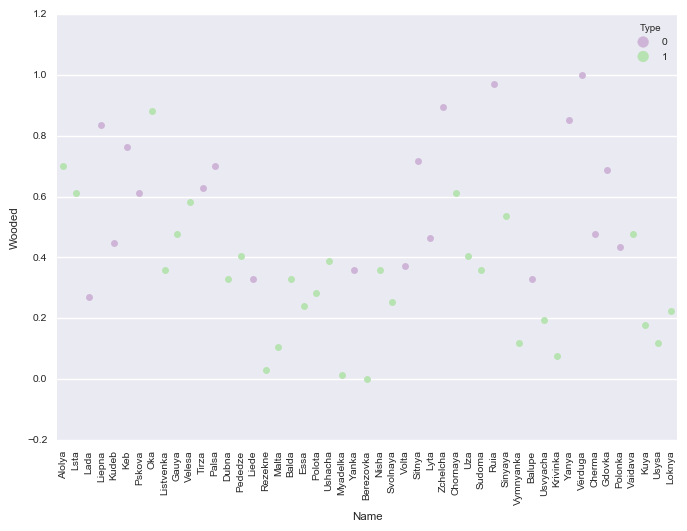

In [10]:
def plot_num(df, cols, by):
    for col in cols:
        g = sns.stripplot(x="Name", y=col, hue="Type", data=rivers_labeled, palette="PRGn")
        for item in g.get_xticklabels():
            item.set_rotation(90)
        plt.show()
rivers_labeled["Name"] = river_names

col_list = ['AverageWatershedSlope', 'AverageRiverSlope', 'CatchmentAreaAverageHeight', "Ozernost'",
       'Waterlogged', 'Wooded']

plot_num(rivers_labeled, col_list, "Type")



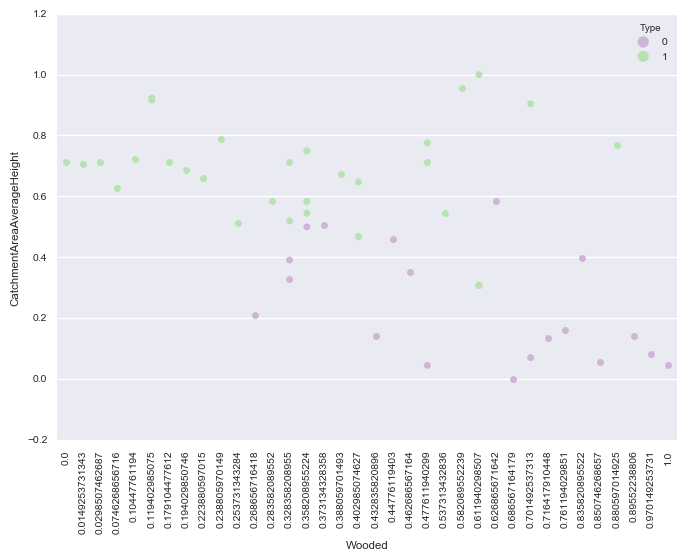

In [11]:
g = sns.stripplot(x="Wooded", y="CatchmentAreaAverageHeight", hue="Type", data=rivers_labeled, palette="PRGn")
for item in g.get_xticklabels():
            item.set_rotation(90)
plt.show()